In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-35.57037375335384, -26.498712373397126),
 (69.90508328077675, 133.21150784771697),
 (60.536517402447345, -99.51435634396503),
 (77.095122669902, 17.50343523952091),
 (85.11746553395818, -164.57564406958105),
 (-60.23749073282441, 46.49214992060209),
 (23.8393502299959, 57.79857066406484),
 (-16.426547141350596, -57.1047533610035),
 (44.26257596488102, 142.99782230278174),
 (-24.655931238450464, -45.62481649540126),
 (-5.97258326009883, -170.9352990073203),
 (-43.18649602578363, -25.345587052604913),
 (-8.51103927168964, -134.3966740207487),
 (-83.3610417201595, -173.90416746941773),
 (-52.34422580865902, -111.91596892208861),
 (-36.06187416951769, 48.05768840085824),
 (-5.79756810312773, -64.99831749964122),
 (0.21914348706184228, -125.36214109668374),
 (13.22082480723273, -144.8407424705458),
 (63.96625931274582, 32.20905921835353),
 (-25.757616992475818, -4.788432008530975),
 (-46.1550548733964, 97.27069699087974),
 (-83.52006716589683, -169.1174839028592),
 (-16.18164223277421, -

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10ec51f53fab2eb780ceb0558541a08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | verkhoyansk
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | ruwi
Processing Record 8 of Set 1 | pocone
Processing Record 9 of Set 1 | mombetsu
Processing Record 10 of Set 1 | sao sebastiao
Processing Record 11 of Set 1 | saleaula
City not found. Skipping...
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | canutama
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | muyezerskiy
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | santa lucia
Processing Record 22

Processing Record 36 of Set 4 | mar del plata
Processing Record 37 of Set 4 | pak phanang
Processing Record 38 of Set 4 | mentok
City not found. Skipping...
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | fairbanks
Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | kailaras
Processing Record 44 of Set 4 | waycross
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | aksu
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | challapata
Processing Record 49 of Set 4 | coahuayana
Processing Record 50 of Set 4 | saint-paul
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | prado
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | novyy svit
Processing Record 5 of Set 5 | roura
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | mae sot
Processing Record 8 of Set 5 | yarmouth
Processing Record 9 of Set 5 | tura

Processing Record 25 of Set 8 | kerouane
Processing Record 26 of Set 8 | odder
Processing Record 27 of Set 8 | sitka
Processing Record 28 of Set 8 | kuala terengganu
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | oksfjord
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | arcachon
Processing Record 36 of Set 8 | gazanjyk
Processing Record 37 of Set 8 | bichura
Processing Record 38 of Set 8 | hanna
Processing Record 39 of Set 8 | sao miguel do araguaia
Processing Record 40 of Set 8 | wawa
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | grenville
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | aketi
Processing Record 45 of Set 8 | samana
Processing Record 46 of Set 8 | montes claros
Processing Record 47 of Set 8 | orshanka
Processing Record 48 of Set 8 |

Processing Record 9 of Set 12 | chodziez
Processing Record 10 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 11 of Set 12 | itaituba
Processing Record 12 of Set 12 | kushima
Processing Record 13 of Set 12 | rauma
Processing Record 14 of Set 12 | tessalit
Processing Record 15 of Set 12 | ust-ishim
Processing Record 16 of Set 12 | caribou
Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | abu samrah
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | san bartolome de tirajana
Processing Record 21 of Set 12 | hit
Processing Record 22 of Set 12 | moen
Processing Record 23 of Set 12 | blairmore
Processing Record 24 of Set 12 | beloha
Processing Record 25 of Set 12 | pangnirtung
Processing Record 26 of Set 12 | baringo
Processing Record 27 of Set 12 | maningrida
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | mineiros
Processing Record 30 of Set 12 | port hawkesbury
Processing Record 31 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,69.55,82,9,25.52,BR,2021-08-08 22:57:40
1,Verkhoyansk,67.5447,133.3850,74.39,32,8,4.61,RU,2021-08-08 22:57:41
2,Thompson,55.7435,-97.8558,69.96,73,40,9.22,CA,2021-08-08 22:55:31
3,Longyearbyen,78.2186,15.6401,40.84,93,75,6.91,SJ,2021-08-08 22:57:41
4,Barrow,71.2906,-156.7887,39.22,88,90,10.36,US,2021-08-08 22:57:41
5,East London,-33.0153,27.9116,63.68,68,37,15.77,ZA,2021-08-08 22:57:42
6,Ruwi,23.5996,58.5507,86.70,76,17,6.89,OM,2021-08-08 22:57:42
7,Pocone,-16.2567,-56.6228,83.86,26,8,4.09,BR,2021-08-08 22:57:42
8,Mombetsu,44.3525,143.3525,65.25,89,100,13.06,JP,2021-08-08 22:57:43
9,Sao Sebastiao,-23.7600,-45.4097,65.46,79,13,4.00,BR,2021-08-08 22:57:43


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-08-08 22:57:40,-22.9661,-42.0278,69.55,82,9,25.52
1,Verkhoyansk,RU,2021-08-08 22:57:41,67.5447,133.3850,74.39,32,8,4.61
2,Thompson,CA,2021-08-08 22:55:31,55.7435,-97.8558,69.96,73,40,9.22
3,Longyearbyen,SJ,2021-08-08 22:57:41,78.2186,15.6401,40.84,93,75,6.91
4,Barrow,US,2021-08-08 22:57:41,71.2906,-156.7887,39.22,88,90,10.36
5,East London,ZA,2021-08-08 22:57:42,-33.0153,27.9116,63.68,68,37,15.77
6,Ruwi,OM,2021-08-08 22:57:42,23.5996,58.5507,86.70,76,17,6.89
7,Pocone,BR,2021-08-08 22:57:42,-16.2567,-56.6228,83.86,26,8,4.09
8,Mombetsu,JP,2021-08-08 22:57:43,44.3525,143.3525,65.25,89,100,13.06
9,Sao Sebastiao,BR,2021-08-08 22:57:43,-23.7600,-45.4097,65.46,79,13,4.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

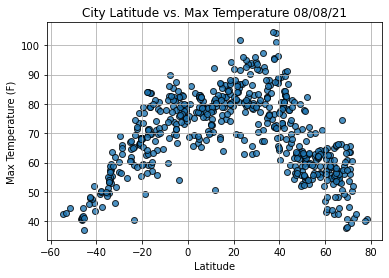

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

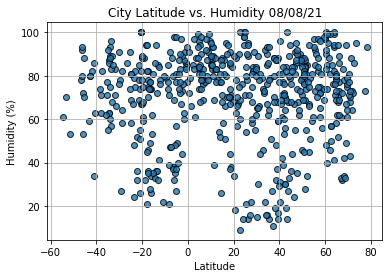

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

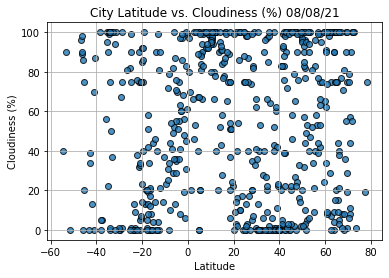

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

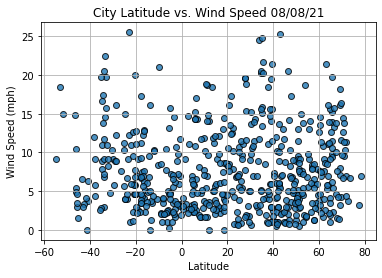

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Canutama
Lat                       -6.5339
Lng                      -64.3831
Max Temp                     85.5
Humidity                       38
Cloudiness                     49
Wind Speed                   1.01
Country                        BR
Date          2021-08-08 22:57:44
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
571     True
572    False
573     True
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Verkhoyansk,67.5447,133.3850,74.39,32,8,4.61,RU,2021-08-08 22:57:41
2,Thompson,55.7435,-97.8558,69.96,73,40,9.22,CA,2021-08-08 22:55:31
3,Longyearbyen,78.2186,15.6401,40.84,93,75,6.91,SJ,2021-08-08 22:57:41
4,Barrow,71.2906,-156.7887,39.22,88,90,10.36,US,2021-08-08 22:57:41
6,Ruwi,23.5996,58.5507,86.70,76,17,6.89,OM,2021-08-08 22:57:42


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

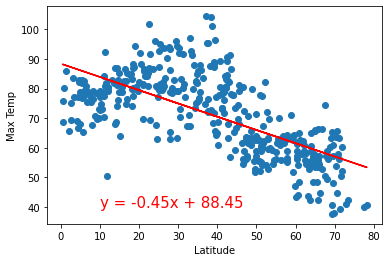

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

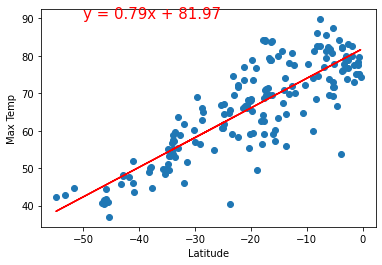

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

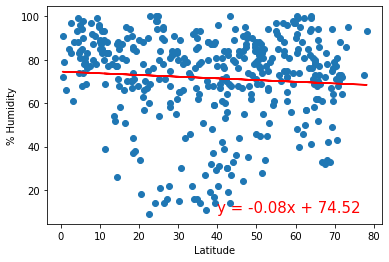

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

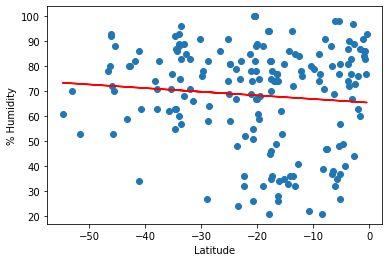

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

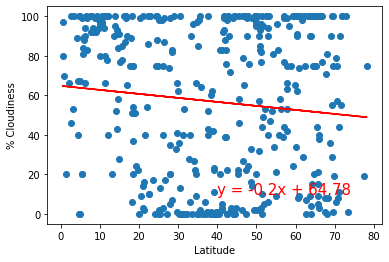

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

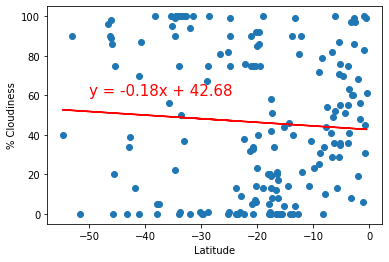

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

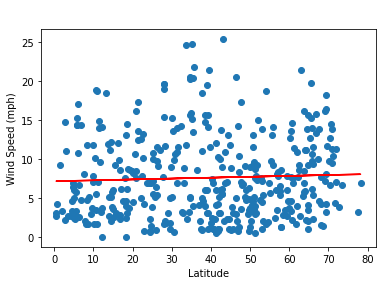

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,28))

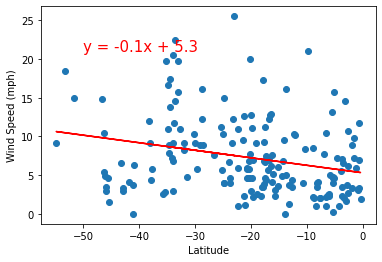

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,21))